# STAT 301 Group Project

### Ben Jia (94374246)

***

## Contents:
- [Deliverable 2 - Data and Questions](#Deliverable-2-(Individual-Assignment-1)---Data-and-Questions)
    - [About the Dataset](#About-the-Dataset:)
    - [Characterization of the Data](#Characterization-of-the-Data:)
    - [Our Question](#Our-Question:)
- [Deliverable 3 - Exploratory Data Analysis & Visualizations](#Deliverable-3-(Individual-Assignment-2)---Exploratory-Data-Analysis-and-Visualization)
    - [Reading and Tidying the Data](#Reading-and-Tidying-Data:)
    - [Initial Visualizations](#Begin-Visualizations:)
    - [Additional Visualizations](#Additional-Visualizations-Using-Week-5-Techniques:)
    - [Conclusions from Preliminary Visualizations](#Preliminary-Visualizations-Conclusion:)
- [Deliverable 4 - Methods and Plan](#Deliverable-4-(Individual-Assignment-3)---Methods-and-Plan)
- [Deliverable 6 - Computational Code and Output](#Deliverable-6-(Individual-Assignment-4)---Computational-Code-and-Output)
    - [Implementation of a Proposed Model](#Implementation-of-a-proposed-model:)
    - [Interpretation of the Model](#Interpretation-of-the-Model)

***

## Deliverable 2 (Individual Assignment 1) - Data and Questions

### About the Dataset:

Our group (group 21) will be working with [this dataset](https://www.kaggle.com/datasets/whenamancodes/predict-diabities), as assigned. Our dataset is related to diabetes, and includes diagnostic measurements/explanatory variables that may or may not be related to diabetes. Compiled onto Kaggle by Aman Chauhan, our data originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK), who collected this data with the objective of being able to predict whether a patient has diabetes based on certain measurements of variables included in the dataset. All patients from which the data was collected are women of at least 21 years of age, of Pima Indian heritage. 

### Characterization of the Data:

The dataset, accessed through the file "diabetes.csv", contains 768 observations and 9 variables. Within the file, 7/9 variables are integer data types, while 2/9 variables are decimal data types. Out of these variables, 8/9 are independent medical predictor/explanatory variables, and 1/9 is the dependent categorical target/response variable. This response variable is indicated by the "Outcome" column in the dataset.

To reiterate, the dataset contains the following 9 variables: (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome)

Below is a full descriptive summary of each variable within the dataset. (Numerical summaries collected before tidying)
- Pregnancies: The count of pregnancies that the individual has had.
    - Data Type: Quantitative (Integer)
    - Mean: 3.85
    - SD: 3.37
- Glucose: The blood glucose level of the individual in mg/dL (milligrams per deciliter).
    - Data Type: Quantitative (Integer)
    - Mean: 121
    - SD: 32
- BloodPressure: The blood pressure measurement of the individual in mm Hg (millimeters of mercury).
    - Data Type: Quantitative (Integer)
    - Mean: 69.1
    - SD: 19.3
- SkinThickness: The skin thickness of the individual in mm (millimeters).
    - Data Type: Quantitative (Integer)
    - Mean: 20.5
    - SD: 15.9
- Insulin: The blood insulin level of the individual in $\mu$ U/mL.
    - Data Type: Quantitative (Integer)
    - Mean: 79.8
    - SD: 115
- BMI: The body mass index of the individual in kg/m^2 (weight (kg) over height (m) squared).
    - Data Type: Quantitative (Decimal)
    - Mean: 32
    - SD: 7.88
- DiabetesPedigreeFunction: A function scoring the likelihood of diabetes based on family history (higher value indicates higher likelihood of diabetes).
    - Data Type: Quantitative (Decimal)
    - Mean: 0.47
    - SD: 0.33
- Age: The age of the individual.
    - Data Type: Quantitative (Integer)
    - Mean: 33.2
    - SD: 11.8
- Outcome: The final result on whether the individual has diabetes (0 = Does Not Have Diabetes, 1 = Has Diabetes).
    - Data Type: Categorical (Y/N stored as Integer)
    - Mean: 0.35
    - SD: 0.48

An additional point to keep note of is that although the data does not have any "N/A" data points, there exists some invalid entries in some certain columns (An example of this is entry/row #8, in which a blood pressure of 0 is recorded). Thus, when moving forward for exploratory data analysis, we will need to filter out entries that may be invalid for our purposes.

### Our Question: 

##### Using age, BMI, blood glucose levels, blood pressure, and skin thickness, can we accurately predict whether or not an individual has diabetes?

- Response variable: `Outcome` (Whether or not an individual has diabetes)
- Explanatory variables: `Age`, `BMI`, `Glucose`, `BloodPressure`, `SkinThickness`

Through this project, we aim to answer the above question by focusing on prediction. We will train a classifer that can predict whether or not an individual is expected to have diabetes based on the following 5 explanatory variables: `Age`, `BMI`, `Glucose`, `BloodPressure`, and `SkinThickness`. 

I initially only chose the two variables `Age` and `BMI` specifically, because although including the other possible explanatory variables in the classifier can potentially increase its prediction success rate, I believe that focusing on age and BMI is more practical for the use of the general public. This is because most people do not know things such as their blood glucose level or their blood insulin level. However, they are likely to know their age, weight, and height. Thus, everyday people can use the classifier that we trained for this project to predict whether or not they are expected to have diabetes based on factors that they themselves know.

That being said, through training a classifier/predictor using our dataset, we can answer the question proposed above, since we have access to a reasonably large dataset that contains entries using both of our explanatory variables and our response variable. Additionally, for the response variable, at a glance we should have sufficient instances of 'has diabetes' and 'does not have diabetes', such that we can train our classifier.

(After reviewing TA feedback, I have decided to add `Glucose`, `BloodPressure`, and `SkinThickness` as additional explanatory variables, since adding additional predictors are likely to increase the accuracy of prediction results. Additionally, after performing model selection, it is possible that certain explanatory variables will be omitted.)

***

## Deliverable 3 (Individual Assignment 2) - Exploratory Data Analysis and Visualization

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(cowplot)
library(GGally) # For ggpairs() function

library(glmnet)
library(tidymodels)
library(car)
library(leaps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.

### Reading and Tidying Data:

First, let us demonstrate that our dataset (in the form of a `.csv` file) can be loaded from the web into our R workspace: 

- Note that I downloaded and placed the dataset into a web repository which the data is read from.
    - (This was the norm in DSCI 100 and STAT 201, as it allows us to load from a more stable source)

In [2]:
diabetes <- read_csv("https://raw.githubusercontent.com/Ehsian/STAT-301-Project/main/diabetes.csv")
head(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

However, note that we are not interested in using all of the variables. Additionally, although the original dataset does not contain any `N/A` data, there exists some data entries in which such a person can not possibly exist (such as entries where `BMI = 0` or `Glucose = 0`). 

The following code cell selects all the variables we are interested in (our 5 explanatory variables `Age`, `BMI`, `Glucose`, `BloodPressure`, and `SkinThickness`, as well as our response variable `Outcome`). It also filters out all rows/entries that are invalid (i.e. impossible to exist).

**Note:** In deliverable 2 (data and questions), I initially specified that the only explanatory variables I based my question on were `Age` and `BMI`. However, after reviewing TA feedback, I have decided to add `Glucose`, `BloodPressure`, and `SkinThickness` as additional explanatory variables, since adding additional predictors are likely to increase the accuracy of prediction results. Additionally, after performing model selection, it is possible that certain explanatory variables will be omitted. All changes are now applied.

In [3]:
diabetes_tidy <- diabetes |>
    select(Outcome,Age,BMI,Glucose,BloodPressure,SkinThickness) |>
    filter(Age!=0) |> # Note that there are some invalid entries in the original dataset (such as BMI = 0)
    filter(BMI!=0) |>
    filter(Glucose!=0) |>
    filter(BloodPressure!=0) |>
    filter(SkinThickness!=0) |>
    mutate(Outcome = as.factor(Outcome)) # Turns `Outcome` from a double to a factor (T/F data type)

head(diabetes_tidy)

Outcome Age BMI  Glucose BloodPressure SkinThickness
1 1       50  33.6 148     72            35           
2 0       31  26.6  85     66            29           
3 0       21  28.1  89     66            23           
4 1       33  43.1 137     40            35           
5 1       26  31.0  78     50            32           
6 1       53  30.5 197     70            45

### Begin Visualizations:

Firstly, let's see how many people in our tidied and subsetted dataset are diabetic, and how many are not:

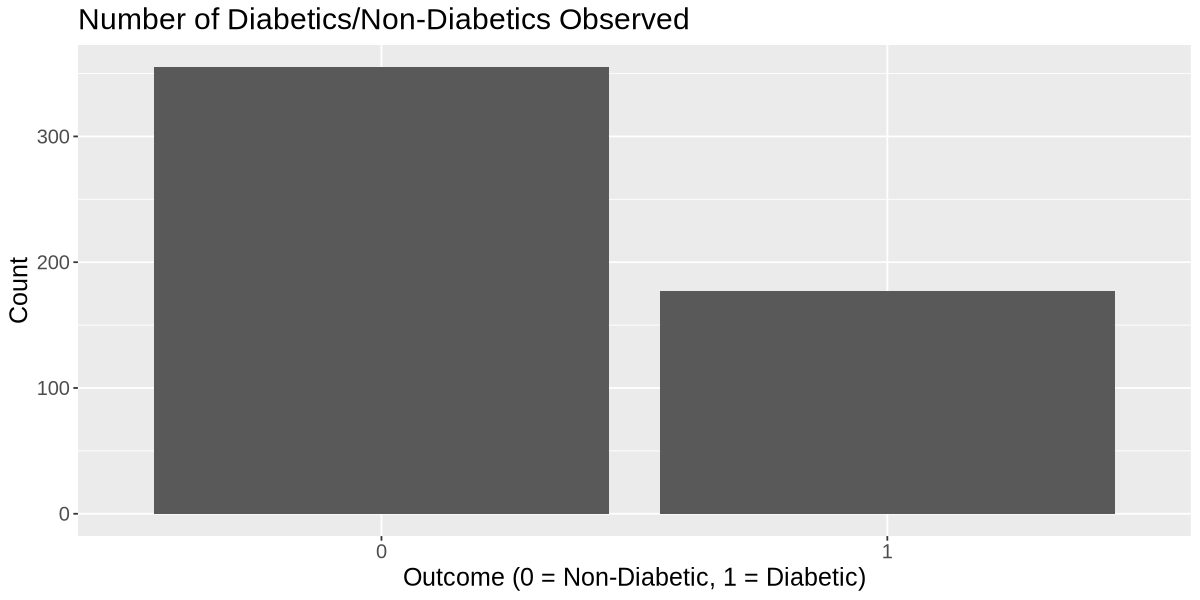

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5) 
outcome_plot <- diabetes_tidy |>
    ggplot() + 
    geom_bar(aes(x=Outcome)) +
    ggtitle("Number of Diabetics/Non-Diabetics Observed") +
    xlab("Outcome (0 = Non-Diabetic, 1 = Diabetic)") +
    ylab("Count") +
    theme(text = element_text(size = 15))
outcome_plot

We observe that in our subsetted and tidied data, there are approximately double the amount of non-diabetic data entries compared to diabetic entries. 

Next, we can make individual bar plots using the mean values of each explanatory variable and comparing their values in non-diabetics v.s. diabetics. Then, using the `cowplot` library, we can arrange the plots side-by-side to visualize which explanatory variables appear to have more of an impact at first glance. 

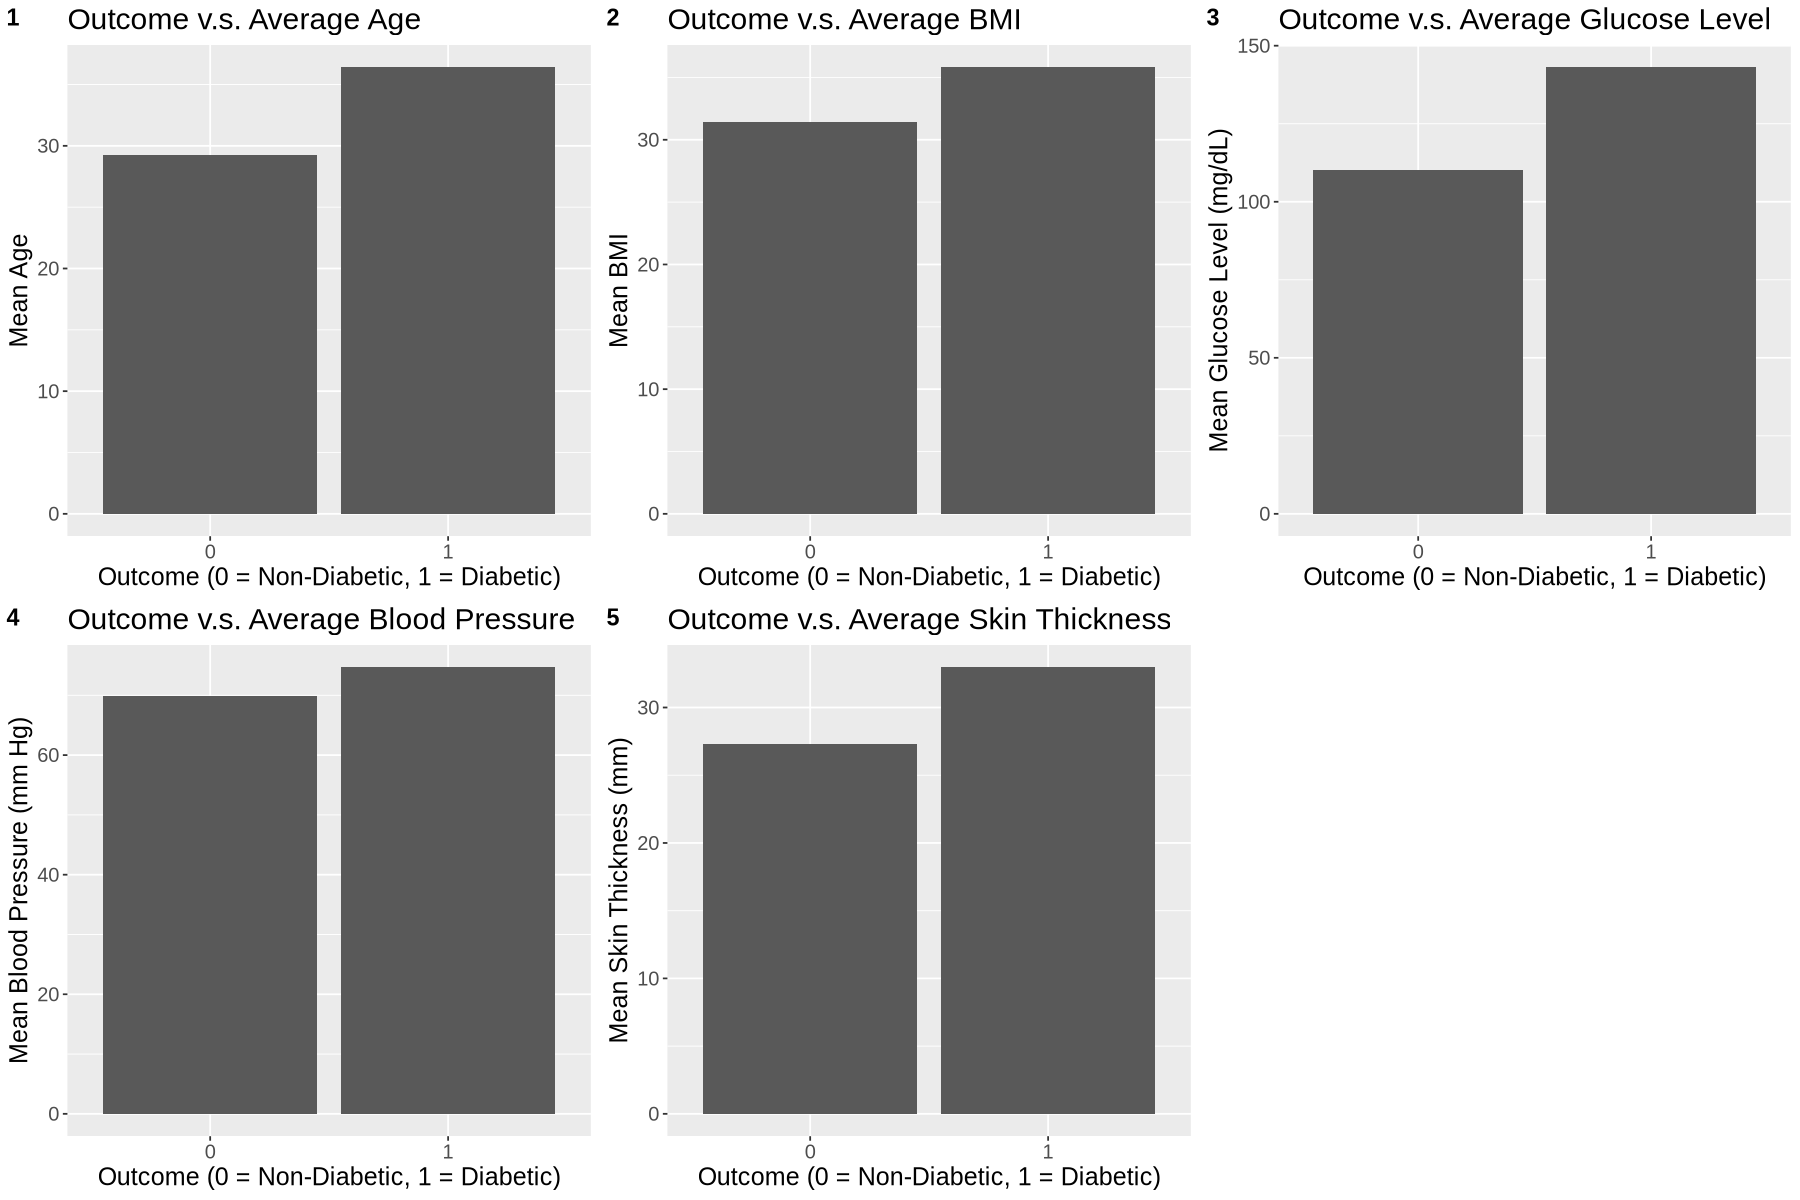

In [5]:
plot_age <- diabetes_tidy |>
    group_by(Outcome) |>
    summarize(mean = mean(Age)) |>
    ggplot() + 
    geom_col(aes(x=Outcome,y=mean)) +
    ggtitle("Outcome v.s. Average Age") +
    xlab("Outcome (0 = Non-Diabetic, 1 = Diabetic)") +
    ylab("Mean Age") +
    theme(text = element_text(size = 15))

plot_bmi <- diabetes_tidy |>
    group_by(Outcome) |>
    summarize(mean = mean(BMI)) |>
    ggplot() + 
    geom_col(aes(x=Outcome,y=mean)) +
    ggtitle("Outcome v.s. Average BMI") +
    xlab("Outcome (0 = Non-Diabetic, 1 = Diabetic)") +
    ylab("Mean BMI") +
    theme(text = element_text(size = 15))

plot_glucose <- diabetes_tidy |>
    group_by(Outcome) |>
    summarize(mean = mean(Glucose)) |>
    ggplot() + 
    geom_col(aes(x=Outcome,y=mean)) +
    ggtitle("Outcome v.s. Average Glucose Level") +
    xlab("Outcome (0 = Non-Diabetic, 1 = Diabetic)") +
    ylab("Mean Glucose Level (mg/dL)") +
    theme(text = element_text(size = 15))

plot_bp <- diabetes_tidy |>
    group_by(Outcome) |>
    summarize(mean = mean(BloodPressure)) |>
    ggplot() + 
    geom_col(aes(x=Outcome,y=mean)) +
    ggtitle("Outcome v.s. Average Blood Pressure") +
    xlab("Outcome (0 = Non-Diabetic, 1 = Diabetic)") +
    ylab("Mean Blood Pressure (mm Hg)") +
    theme(text = element_text(size = 15))

plot_skin <- diabetes_tidy |>
    group_by(Outcome) |>
    summarize(mean = mean(SkinThickness)) |>
    ggplot() + 
    geom_col(aes(x=Outcome,y=mean)) +
    ggtitle("Outcome v.s. Average Skin Thickness") +
    xlab("Outcome (0 = Non-Diabetic, 1 = Diabetic)") +
    ylab("Mean Skin Thickness (mm)") +
    theme(text = element_text(size = 15))

options(repr.plot.width = 15, repr.plot.height = 10) 
plot_grid(plot_age, plot_bmi, plot_glucose, plot_bp, plot_skin,labels = c('1', '2', '3', '4', '5'))

From the above grid of plots, we can observe the following:
1. Average age of observed diabetics is fairly greater than that of observed non-diabetics.
2. Average BMI of observed diabetics is greater than that of observed non-diabetics.
3. Average glucose level of observed diabetics is significantly greater than that of observed non-diabetics.
4. Average blood pressure of observed diabetics is slightly greater than that of observed non-diabetics.
5. Average skin thickness of observed diabetics is greater than that of observed non-diabetics.

### Additional Visualizations Using Week 5 Techniques:

Aside from the above visualizations, we can also use the `ggpairs()` function to visualize the association between **all** variables.

Note: The skeletons for the remaining code below is taken from tutorial_05. The contents of tutorial_05 produces these plots to visualize the potential problem of multicollinearity. However, by including all variables (both explanatory and response), we can perform basic visualizations between all variables. In future parts of this project, analyzing for multicollinearity and other related techniques may be used. However, at the moment, the code and figures are only used for visualization purposes without technical analysis.

Note 2: In order to observe correlation coefficients, `Outcome` can not be of 'factor' data type, so it was converted back to a numeric.

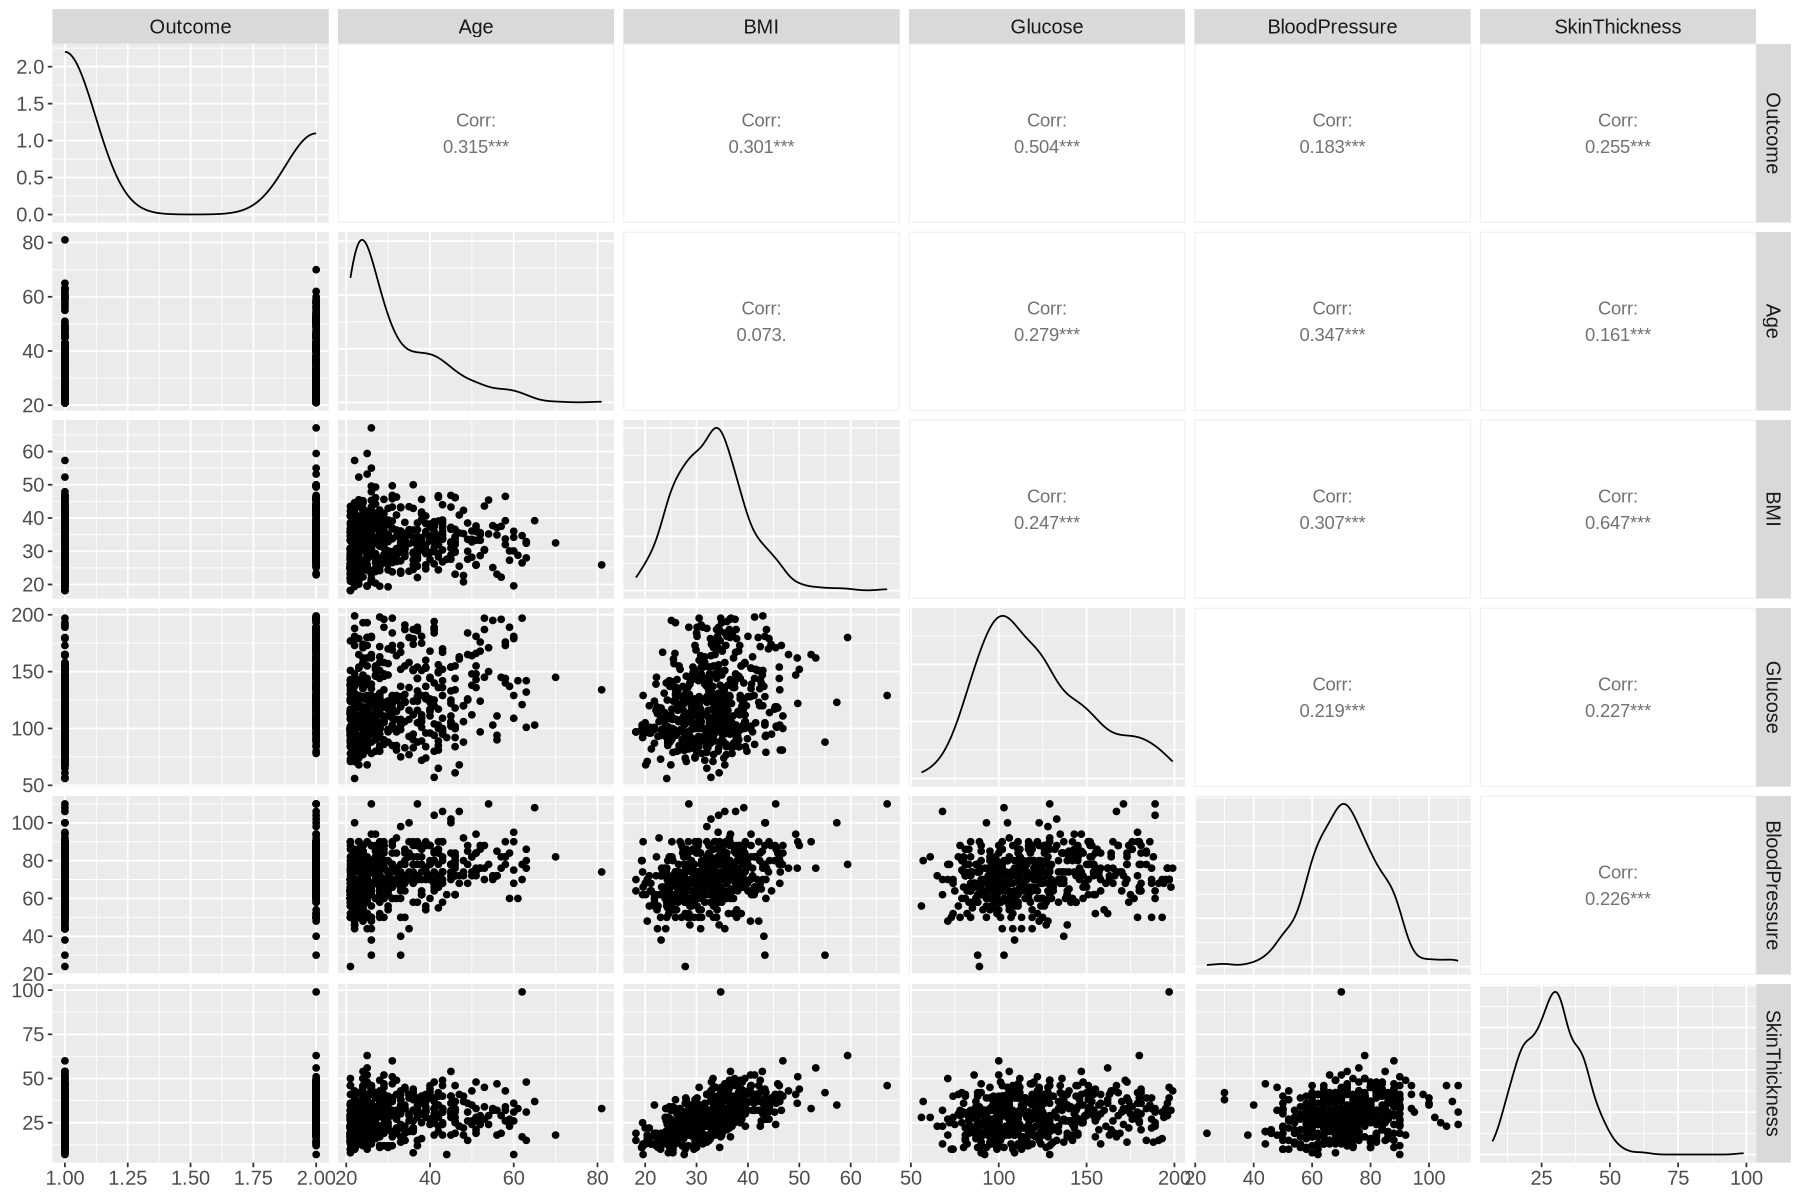

In [6]:
diabetes_pair_plots <- diabetes_tidy |>
  mutate(Outcome = as.numeric(Outcome)) |> # Convert 'Outcome' back to a numeric to obtain correlation coefficients
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
diabetes_pair_plots

From the plot above, some initial observations include:
- For the `Outcome` row, the correlation coefficient observed in the `Glucose` column is noticably the greatest. This seems to align with our observations of the side-by-side barplots above.
- Skin thickness appears quite strongly correlated with BMI, with a correlation coefficient of 0.647. (this could lead to potential multicollinearity issues, to be discussed in the future)


Using additional techniques learned in tutorial_05, we can create a correlation heatmap of all the variables to form a correlation visualization that is easier to interpret than the one generated above using `ggpairs()`.

var1    var2          corr     
1 Outcome Outcome       1.0000000
2 Outcome Age           0.3150968
3 Outcome BMI           0.3009007
4 Outcome Glucose       0.5036139
5 Outcome BloodPressure 0.1834319
6 Outcome SkinThickness 0.2548737

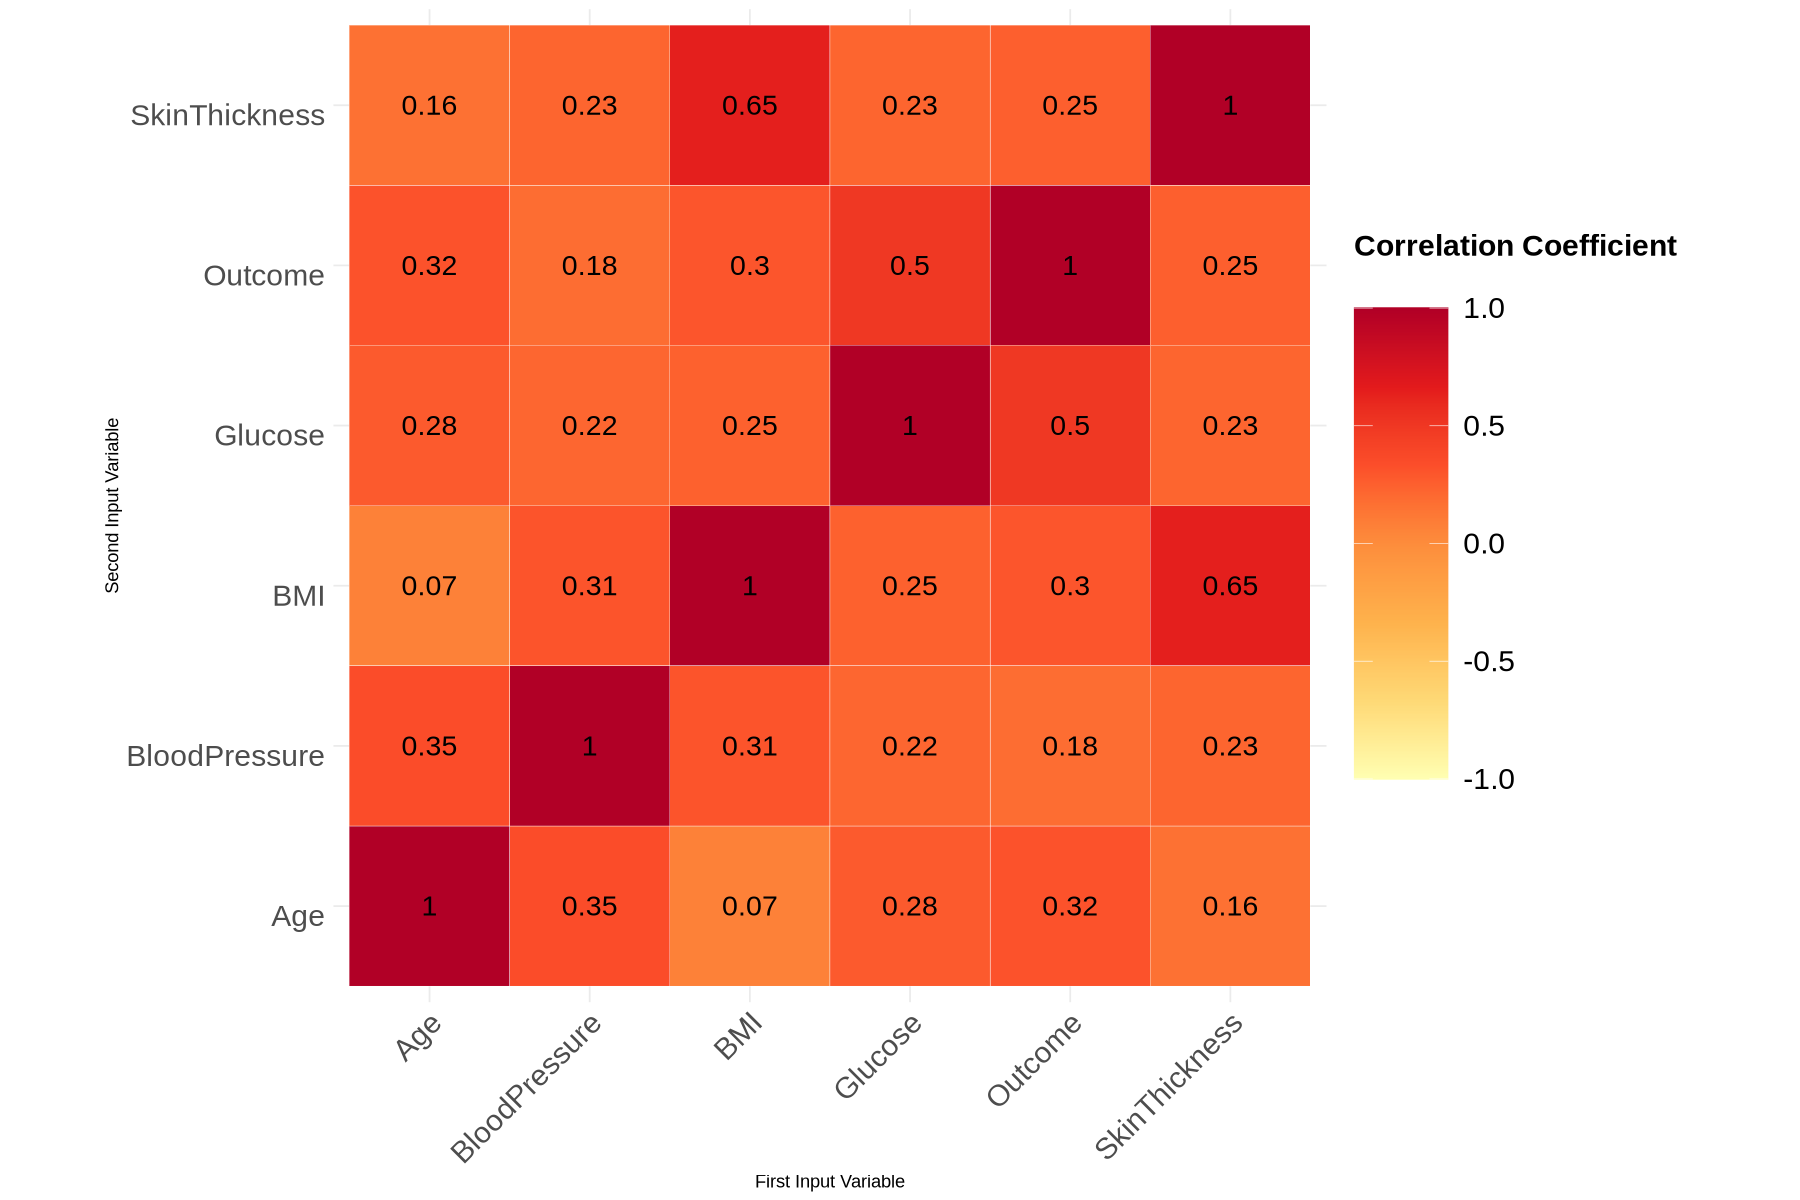

In [7]:
corr_matrix_diabetes <- diabetes_tidy |>
  mutate(Outcome = as.numeric(Outcome)) |> # Like in the ggpairs() plot above, convert 'Outcome' back to a numeric to obtain correlation coefficients
  cor() |>
  as.data.frame() |>
  rownames_to_column("var1") |>
  pivot_longer(-var1, names_to = "var2", values_to = "corr")
head(corr_matrix_diabetes)

options(repr.plot.width = 15, repr.plot.height = 10) 
plot_corr_matrix_diabetes <- corr_matrix_diabetes |>
  ggplot(aes(x=var1, y=var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette = "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "First Input Variable", y = "Second Input Variable") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(x=var1, y=var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_diabetes

We observe the following correlation coefficients between explanatory variables and the response variable `Outcome`:
1. Age: 0.32
2. Blood Pressure: 0.18
3. BMI: 0.3
4. Glucose: 0.5
5. Skin Thickness: 0.25

(Again, note that `SkinThickness` and `BMI` have a correlation coefficient of 0.65, which may be an indication of potential multicollinearily problems for the model we will create.)

### Preliminary Visualizations Conclusion:

Through the plots and figures generated in this section, we have succesfully identified that there may exist correlations between our explanatory variables and response variable that suggests that we can create a model predicting whether an individual has diabetes based on said explanatory variables. However, we also discovered correlations between explanatory variables that suggests we will need to check for multicollinearity when performing model selection. Additionally, we have observed that blood glucose level seems to be the most noticably correlated to having diabetes. Thus we expect that it will be a big part of our final model for prediction.

***

## Deliverable 4 (Individual Assignment 3) - Methods and Plan

Recall our question of interest: 

> "Using age, BMI, blood glucose levels, blood pressure, and skin thickness, can we accurately predict whether or not an individual has diabetes?"

We aim to address this question by proposing the following methods in order to develop a predictive model that can effectively capture the relationships between our chosen explanatory variables and our response variable of whether or not an individual has diabetes. Within these methods, we need to address potential challenges such as overfitting, multicollinearity, and model selection bias, in order to improve the reliability and generalizability of our findings, providing valuable insight on the matter.

### Step 1: Data splitting

We will first divide our dataset into training and testing subsets, which ensures that our final model is trained on one subset and tested on another, to avoid biased estimation of the model's performance.

This is appropriate because by assessing the model's performance on unseen data (the testing set), we can get a more reliable evaluation of the predictive capability of the model. A potential limitation includes the issue of the split being an outlier, in which the data in the training and testing sets differ greatly by chance.

### Step 2: Model Selection - Forward v.s. Backward Selection

We will choose between the forward and backward selection techniques to identify relevant variables. 

Recalling what each type of selection does, the forward selection approach starts with nothing and adds each new variable one by one, testing for statistical significance. Whereas the backward selection approach starts with all the variables and removes one variable at a time to test if that variable is important relative to the model results. 

The purpose of this step is to select a subset of explanatory variables (out of our existing pool of chosen explanatory variables) that are most important for our model, and filtering out insignificant variables.

However, forward and backward selection techniques have some drawbacks, such as their high potential computational complexity (due to iteratively evaluating multiple subsets), and potential overfitting problems.

### Step 3: Perform Ridge Regression

We will perform ridge regression, as demonstrated in tutorial 10. This is done to address multicollinearity issues within the dataset, which we visualized and found possible problems through our exploratory data analysis. Ridge regression shrinks the coefficients of variables towards zero, aiming to minimize the MSE (mean squared error). Thus, less significant variables will have smaller coefficients. 

The purpose of performing ridge regression is to address multicollinearity and overfitting. By first employing forward/backward selection then performing ridge regression, we first identify the most relevant predictors, then we address the potential multicollinearity problems within the selected predictors. Thus, we ensure that our final model is interpretable and effective.

One drawback of ridge regression is that there may be decreased interpretability compared to simpler models, due to the addition of the penalty term.

### Step 4: Interpretations, Inferences, and Conclusion

Our final step is to test our model on our testing subset, and to interpret our model and its results. In addition to testing the model on the testing subset, we will also make 95% prediction intervals and confidence intervals for prediction in order to observe the range of possible outcomes from our model, and to see the reliability of the predictions that our model gives us. Note that prediction intervals estimate the range in which future observations will land, while confidence intervals for prediction estimates the range in which the mean of future observations will land. Both types of intervals are useful methods of assessing the uncertainty of the predictions generated by our model.

Through implementing all the above steps, we aim to create a model that selects relevant variables and addresses problems such as multicollinearity and overfitting to answer our question and provide us insight on the relationships between our explanatory variables and our response variable. 

***

## Deliverable 6 (Individual Assignment 4) - Computational Code and Output

In order to match what the suggested methods and final model will reflect, the question is modified to become:

##### Out of age, BMI, blood glucose levels, blood pressure, and skin thickness, which variables are most significant to predict whether or not an individual has diabetes?

### Implementation of a proposed model:

In [8]:
set.seed(2024) # We need to set the seed of any code cells containing some form of randomness, for reproducibility.

# Step 1: Data Splitting

diabetes_tidy <- diabetes_tidy |> mutate(Outcome = as.numeric(Outcome))

diabetes_split <- initial_split(diabetes_tidy, prop=0.75, strata=Outcome) # 75% of data is training, 25% is testing
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)

In [9]:
set.seed(2024)

# Step 2: Forward/Backward Selection
# In this implementation, we will use forward selection.

diabetes_forward_sel <- regsubsets(
  Outcome ~ ., data=diabetes_train,
  method="forward"
)

# diabetes_forward_sel

diabetes_fwd_summary <- summary(diabetes_forward_sel)

diabetes_fwd_summary <- tibble(
   n_input_variables = 1:5,
   RSS = diabetes_fwd_summary$rss,
   BIC = diabetes_fwd_summary$bic,
   Cp = diabetes_fwd_summary$cp
)

cp_min = which.min(diabetes_fwd_summary$Cp) # Size of model that minimizes Cp

selected_var <- names(coef(diabetes_forward_sel, cp_min))[-1]
# selected_var

# From forward selection, we select Age, BMI, Glucose.
# This indicates that the forward selection algorithm determined that "BloodPressure" and "SkinThickness"
# are less important for predicting the "Outcome" variable.

diabetes_train_selected <- diabetes_train |> select(Outcome, all_of(selected_var))
diabetes_test_selected <- diabetes_test |> select(Outcome, all_of(selected_var))

In [10]:
set.seed(2024)

# Step 3: Ridge Regression

# Build matrix and vector required by `glmnet`
diabetes_X_train <- model.matrix(object = Outcome ~ .,
  data = diabetes_train_selected)[, -1]

diabetes_Y_train <- unlist(diabetes_train_selected[, "Outcome"])

diabetes_X_test <- model.matrix(object = Outcome ~ .,
  data = diabetes_test_selected)[, -1]

diabetes_Y_test <- unlist(diabetes_test_selected[, "Outcome"])

# Cross validation glmnet
diabetes_cv_lambda_ridge <- cv.glmnet(
  x = diabetes_X_train, y = diabetes_Y_train,
  alpha = 0, # alpha = 0 is ridge regression
  lambda = exp(seq(-5, 10, 0.1))
)

# Best lambda value
diabetes_best_lambda <- diabetes_cv_lambda_ridge$lambda.min

# Extract best model using K-cross validation
diabetes_best_fit <- diabetes_cv_lambda_ridge$glmnet.fit

# Model with optimal lambda
diabetes_best_ridge <- glmnet(
    x = diabetes_X_train, y = diabetes_Y_train, 
    alpha = 0, 
    lambda = diabetes_best_lambda
)
tidy(diabetes_best_ridge)

term        step estimate     lambda     dev.ratio
1 (Intercept) 1    -0.083022328 0.03019738 0.3378701
2 Age         1     0.008326148 0.03019738 0.3378701
3 BMI         1     0.014559286 0.03019738 0.3378701
4 Glucose     1     0.005552367 0.03019738 0.3378701

### Interpretation of the Model

The proposed model answers the modified question by showing that out of our selected explanatory variables, `BMI` has the largest effect on `Outcome`, followed by `Age`, then `Glucose`, with the other variables being sufficiently insignificant to exclude.

Initially in the plan, confidence and prediction intervals were to be created, but this would be better suited for an ordinary least squares (OLS) model rather than a ridge regression model, which introduces a shrinkage term and bias in order to reduce variance, mitigating multicollinearity problems. Due to this, the true effect sizes of each explanatory variable on `Outcome` is not directly reflected, so instead of looking at the effect that each explanatory variable has on `Outcome`, we would look at the relative effects/importance of each explanatory variable on `Outcome`.

Note that `glmnet` does not offer standard errors (and by extension, confidence intervals), because standard errors are not very meaningful for strongly biased estimates such as penalized estimation methods like ridge regression, and as such, reporting a standard error of a penalized estimate can give a mistaken impression of the model and what it represents. 